In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [3]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

sms.pairplot(df)

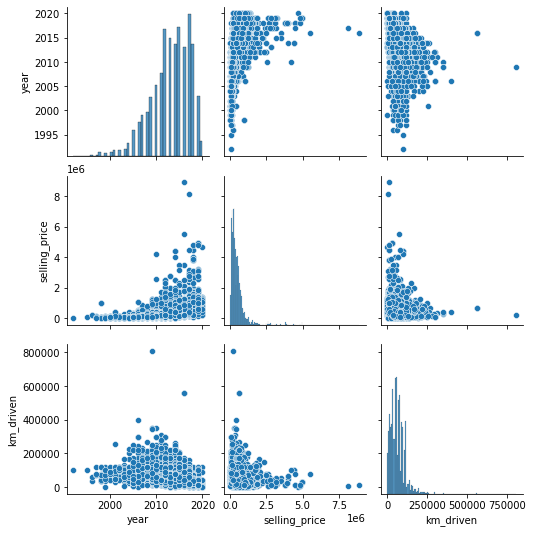

In [6]:
sns.pairplot(df)

In [28]:
enc = LabelEncoder()
df_num_cat = pd.DataFrame()

df_num_cat['name'] = enc.fit_transform(df['name'])
df_num_cat['year'] = enc.fit_transform(df['year'])
df_num_cat['km_driven'] = enc.fit_transform(df['km_driven'])
df_num_cat['fuel'] = enc.fit_transform(df['fuel'])
df_num_cat['seller_type'] = enc.fit_transform(df['seller_type'])
df_num_cat['transmission'] = enc.fit_transform(df['transmission'])
df_num_cat['owner'] = enc.fit_transform(df['owner'])
df_num_cat['selling_price'] = enc.fit_transform(df['selling_price'])

df_num_cat

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,775,13,474,4,1,1,0,17
1,1041,13,335,4,1,1,0,60
2,505,18,607,1,1,1,0,236
3,118,23,309,4,1,1,0,114
4,279,20,681,1,1,1,2,193
...,...,...,...,...,...,...,...,...
4335,602,20,528,1,1,1,2,178
4336,601,20,528,1,1,1,2,178
4337,777,15,547,4,1,1,2,48
4338,381,22,573,1,1,1,0,318


In [29]:
X = df_num_cat[['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]


y = df_num_cat[['selling_price']]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.40,random_state = 101)

In [32]:
X_train,X_test

(      name  year  km_driven  fuel  seller_type  transmission  owner
 3764  1125    22        405     1            1             1      0
 1835     6    19        556     1            0             0      0
 2402   678    11        755     1            1             1      2
 1413   681    10        647     1            1             1      0
 2478   437    22        185     4            0             1      0
 ...    ...   ...        ...   ...          ...           ...    ...
 4079   799    25         34     4            1             1      0
 4171   396    19        354     4            1             1      4
 599    449    23         70     4            0             0      0
 1361   801    17        573     4            1             1      2
 1547   973    15        335     1            1             1      0
 
 [2604 rows x 7 columns],
       name  year  km_driven  fuel  seller_type  transmission  owner
 2603  1254    12        257     4            1             1      2
 1391 

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()

In [35]:
lm.fit(X_train,y_train)

LinearRegression()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,775,13,474,4,1,1,0,17
1,1041,13,335,4,1,1,0,60
2,505,18,607,1,1,1,0,236
3,118,23,309,4,1,1,0,114
4,279,20,681,1,1,1,2,193
...,...,...,...,...,...,...,...,...
4335,602,20,528,1,1,1,2,178
4336,601,20,528,1,1,1,2,178
4337,777,15,547,4,1,1,2,48
4338,381,22,573,1,1,1,0,318


In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = lm.predict(X_test)

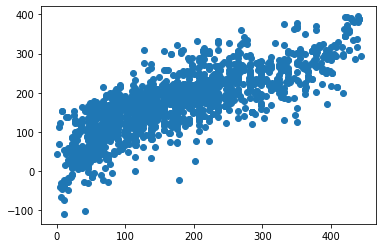

In [41]:
plt.scatter(y_test,y_pred)

In [45]:
print(lm.score(X_test,y_test))

0.6300736042421397
